#  Проект "Обучение с учителем: качество модели" - описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных

### `market_file.csv`
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.\
`id` — номер покупателя в корпоративной базе данных.\
`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».\
`Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.\
`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.\
`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.\
`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.\
`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.\
`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.\
`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.\
`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.\
`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.\
`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

### `market_money.csv`
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.\
`id` — номер покупателя в корпоративной базе данных.\
`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.\
`Выручка` — сумма выручки за период.

### `market_time.csv`
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.\
`id` — номер покупателя в корпоративной базе данных.\
`Период` — название периода, во время которого зафиксировано общее время.\
`минут` — значение времени, проведённого на сайте, в минутах.

### `money.csv`
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.\
`id` — номер покупателя в корпоративной базе данных.\
`Прибыль` — значение прибыли.

## Ход работы

Шаг 1. Загрузка данных\
Шаг 2. Предобработка данных\
Шаг 3. Исследовательский анализ данных\
Шаг 4. Объединение таблиц\
Шаг 5. Корреляционный анализ\
Шаг 6. Использование пайплайнов\
Шаг 7. Анализ важности признаков\
Шаг 8. Сегментация покупателей\
Шаг 9. Общий вывод

### Шаг 1. Загрузка данных

Для начала проведем импорт необходимых библиотек

In [1]:
!pip install shap

     |████████████████████████████████| 539 kB 1.2 MB/s eta 0:00:01


In [2]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math


# библиотека для оценки важности признаков Шепли (SHAP)
import shap
shap.initjs()

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# библиотеки для пайплайнов
# класс ColumnTransformer помогает работать с данными разного типа в одном наборе
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score

# библиотека для анализа весов признаков
import shap

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# библиотека для метода опорных векторов
from sklearn.svm import SVC

# библиотека решающих деревьев
from sklearn.tree import DecisionTreeClassifier


# бибилиотека для графика ROC-кривой и расчёта ROC-AUC
from sklearn.metrics import roc_auc_score, RocCurveDisplay


# библиотека для модели классификации kNN
from sklearn.neighbors import KNeighborsClassifier

# добавим библиотеку для построения scatter диаграмм рассеяния с тренд-линиями
import plotly.express as px
import plotly.graph_objects as go


Далее перейдем к загрузке датафреймов

In [3]:
market_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
market_money_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
market_time_df = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
money_df= pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';',decimal=',')

Проверим датафреймы на корректность отображения

In [4]:
market_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
market_time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [7]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Датафреймы выводятся в нормальном формате, пока недочеты есть чисто визуально, но их обработаем во второй части

### Шаг 2. Предобработка данных

#### 2.1 Таблица market_df

In [8]:
market_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
market_df.shape

(1300, 13)

In [10]:
market_df.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Переведем названия столбцов в стандартный формат

In [11]:
col_name_dict = {
    'id': 'id',
    'Покупательская активность': 'consum_activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'is_allow_report',
    'Маркет_актив_6_мес': 'market_activ_6_mon',
    'Маркет_актив_тек_мес': 'market_activ_cur_mon',
    'Длительность': 'duration',
    'Акционные_покупки': 'promo',
    'Популярная_категория': 'pop_cat_goods',
    'Средний_просмотр_категорий_за_визит': 'mean_view_cat_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_goods_per_quater',
    'Ошибка_сервиса': 'serv_error',
    'Страниц_за_визит': 'webpage_per_visit'
}

In [12]:
market_df.rename(columns=col_name_dict, inplace=True)

In [13]:
market_df.columns

Index(['id', 'consum_activity', 'service_type', 'is_allow_report',
       'market_activ_6_mon', 'market_activ_cur_mon', 'duration', 'promo',
       'pop_cat_goods', 'mean_view_cat_per_visit', 'unpaid_goods_per_quater',
       'serv_error', 'webpage_per_visit'],
      dtype='object')

Все переименовалось, теперь посмотрим общую инфу о типах данных

In [14]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   consum_activity          1300 non-null   object 
 2   service_type             1300 non-null   object 
 3   is_allow_report          1300 non-null   object 
 4   market_activ_6_mon       1300 non-null   float64
 5   market_activ_cur_mon     1300 non-null   int64  
 6   duration                 1300 non-null   int64  
 7   promo                    1300 non-null   float64
 8   pop_cat_goods            1300 non-null   object 
 9   mean_view_cat_per_visit  1300 non-null   int64  
 10  unpaid_goods_per_quater  1300 non-null   int64  
 11  serv_error               1300 non-null   int64  
 12  webpage_per_visit        1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


Типы данных в порядке, пропусков также нет, проверим на явные дубликаты

In [15]:
market_df.duplicated().sum()

0

Явных дублей нет. Далее отработаем неявные дубли

In [16]:
# запускаем цикл на проверку содержимого категориальных столбцов - ищем уникальные названия

for col in market_df.select_dtypes(exclude='number').columns.tolist():
    print(f'{col} : {market_df[col].unique()}')
    print()


consum_activity : ['Снизилась' 'Прежний уровень']

service_type : ['премиум' 'стандартт' 'стандарт']

is_allow_report : ['да' 'нет']

pop_cat_goods : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



In [17]:
market_df.loc[market_df.service_type== 'стандартт', "service_type"]= 'стандарт'

In [18]:
market_df.service_type.unique()

array(['премиум', 'стандарт'], dtype=object)

Вывод: с дубликатами разобрались, ошибку устранили. пропусков в датасете нет. Поработаем со следующей таблицей

#### 2.2 Таблица market_money

In [19]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [20]:
market_money_df.shape

(3900, 3)

Посмотрим на возможные ошибки с кодированием периода

In [21]:
market_money_df['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Все-таки, подобное описание несмотря на допустимость не совсем хорошо будет смотреться в контексте проекта, поэтому переименуем кодировки в общепринятом формате. Также трансфоримруем таблицу для получения информации о выручке для каждого из периодов

In [22]:
market_money_df_tr = market_money_df.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum').reset_index()
market_money_df_tr.columns.name = None
market_money_df_tr.columns = ['id', 'last_last_rev', 'last_rev', 'current_rev']

market_money_df_tr.head()

,id,last_last_rev,last_rev,current_rev
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


Теперь проверим размерность, по идее должна снизиться в 3 раза с 3900 до 1300 из-за перекодировки

In [23]:
market_money_df_tr.shape

(1300, 4)

Проверим явные дубли

In [24]:
market_money_df_tr.duplicated().sum()

0

In [25]:
market_money_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1300 non-null   int64  
 1   last_last_rev  1300 non-null   float64
 2   last_rev       1300 non-null   float64
 3   current_rev    1300 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.8 KB


Теперь размер выборки совпадает с размером market_df, а данные в столбцах отражают выручку за каждый период

дубликатов в таблице нет, пустых значений тоже

#### 2.3 Таблица market_time

In [26]:
market_time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [27]:
market_time_df.shape

(2600, 3)

In [28]:
market_time_df['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

проведем ту же операцию по трансформации:
- сначала разобьем периоды на текущий и предыдущий месяцы
- потома в значения столбцов попадут количество минут, проведенных пользователем на сайте

In [29]:
market_time_df.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()

Период,id,предыдцщий_месяц,текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


In [30]:
market_time_df_tr = market_time_df.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()
market_time_df_tr.columns.name = None
market_time_df_tr.columns=['id', 'last_dur_minutes', 'current_dur_minutes']
market_time_df_tr.head()

,id,last_dur_minutes,current_dur_minutes
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [31]:
market_time_df_tr.shape

(1300, 3)

In [32]:
market_time_df_tr.duplicated().sum()

0

In [33]:
market_time_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   1300 non-null   int64
 1   last_dur_minutes     1300 non-null   int64
 2   current_dur_minutes  1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


Теперь размер выборки совпадает с размером market_df, а данные в столбцах отражают длительность нахождения на сайте за каждый период

дубликатов в таблице нет, пустых значений тоже

#### 2.4 Таблица money

In [34]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [35]:
money_df.duplicated().sum()

0

In [36]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


дубликатов, пустых значений в таблице нет

### Шаг 3. Исследовательский анализ данных


Создадим 4 функции:

- вытягивания имени из переменной (для корректного наименования графиков)
- построения гистограммы и boxplot для количественных признаков
- построения столбчатых диаграмм для категориальных признаков

- сборная функция построения всей аналитики для любого датасета

In [37]:
# функция получения имени переменной

def get_var_name(var, caller_locals):
    import inspect
    for name, value in caller_locals.items():
        if value is var:
            return name
    return None

In [38]:
# функция для построения гистограммы и boxplot для любого столбца любого датафрейма

def plot_hist_boxplot(some_df, col, col_name, dataset_name):

    df_for_plot= some_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значения признака {col_name}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'Значение признака {col_name}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()

In [39]:
# функция построения столбчатой диаграммы

def barplot_df(dataset, col, col_name, dataset_name):
    dataset[col].value_counts().plot(kind='bar', legend=True, figsize=(10,5))
    plt.title(f'Диаграмма частоты признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значение признака {col_name}')
    plt.ylabel(f'Частота признака {col_name}')
    plt.show()

In [40]:
# функция получения аналитических данных для любой таблицы

def analysis_df(some_df: pd.DataFrame):
    # блок вытягивания имени
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals

    dataset_name = get_var_name(some_df, caller_locals)


    print(f'Статистический анализ таблицы {dataset_name}')  # печатаем имя таблицы (из переменной)
    display(some_df.describe().T)

    # блок построения гистограмм и диаграмм

    cat_col_list = some_df.select_dtypes(exclude='number').columns.tolist()
    num_col_list = some_df.select_dtypes(include='number').columns.tolist()

    dict_names = {v: k for k,v in col_name_dict.items()}

    for col in num_col_list:
        plot_hist_boxplot(some_df=some_df, col_name=col, col=col, dataset_name=dataset_name)

    for col in cat_col_list:   # для категориальных столбцов
        try:
            barplot_df(dataset=some_df, col_name=col, col=col, dataset_name=dataset_name)
        except KeyError:
            continue

Далее запустим цикл с применением функций для наших таблиц

Статистический анализ таблицы market_df


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
market_activ_6_mon,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
market_activ_cur_mon,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
duration,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
promo,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
mean_view_cat_per_visit,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
unpaid_goods_per_quater,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
serv_error,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
webpage_per_visit,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


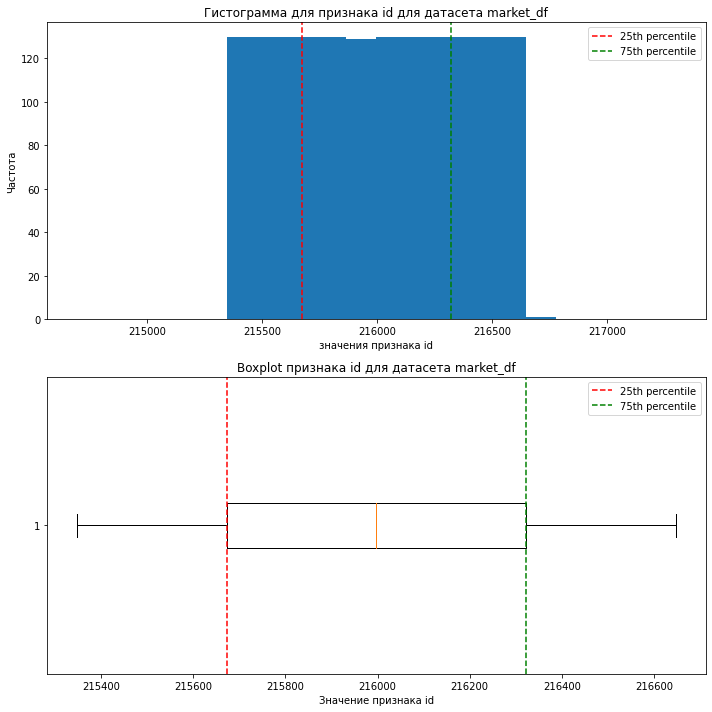

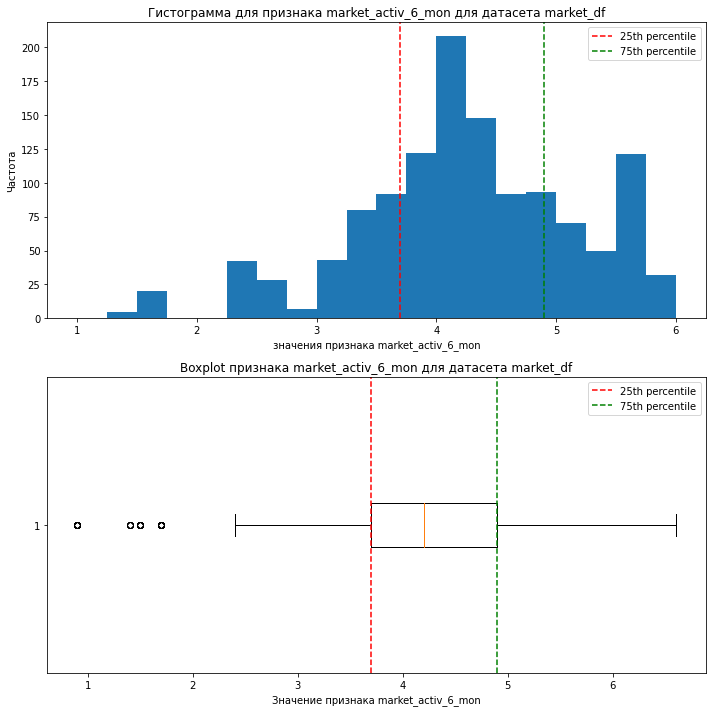

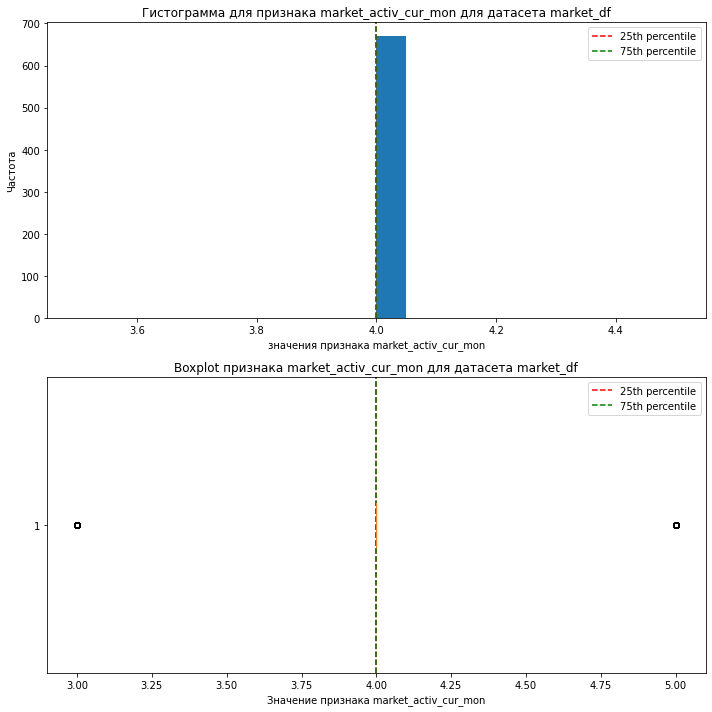

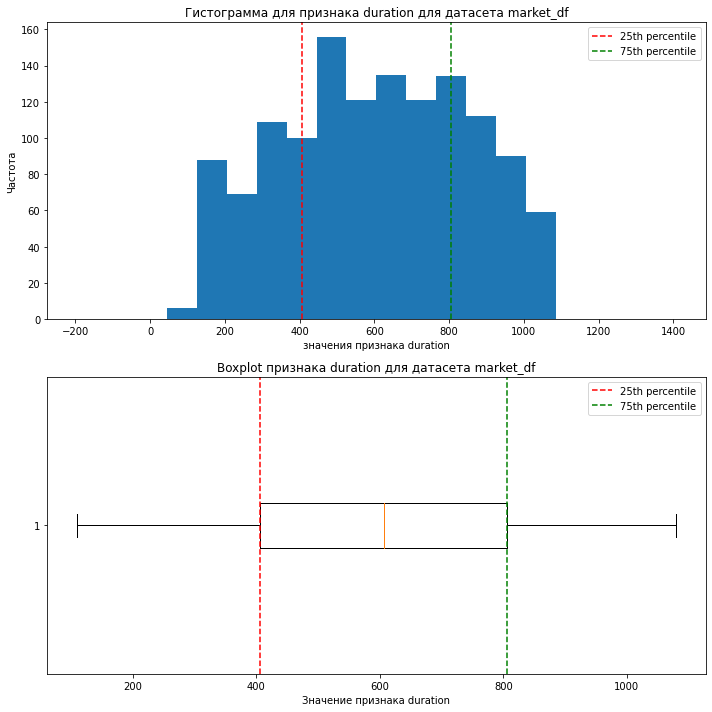

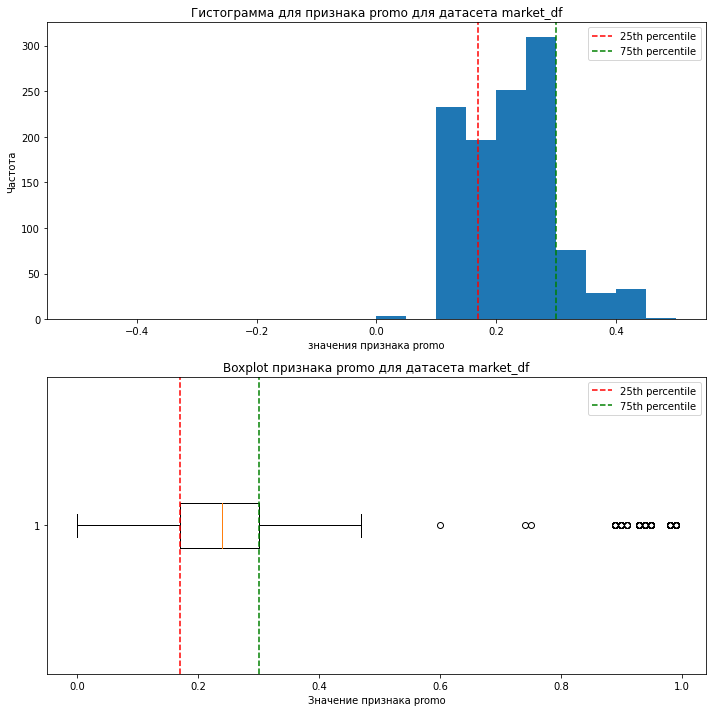

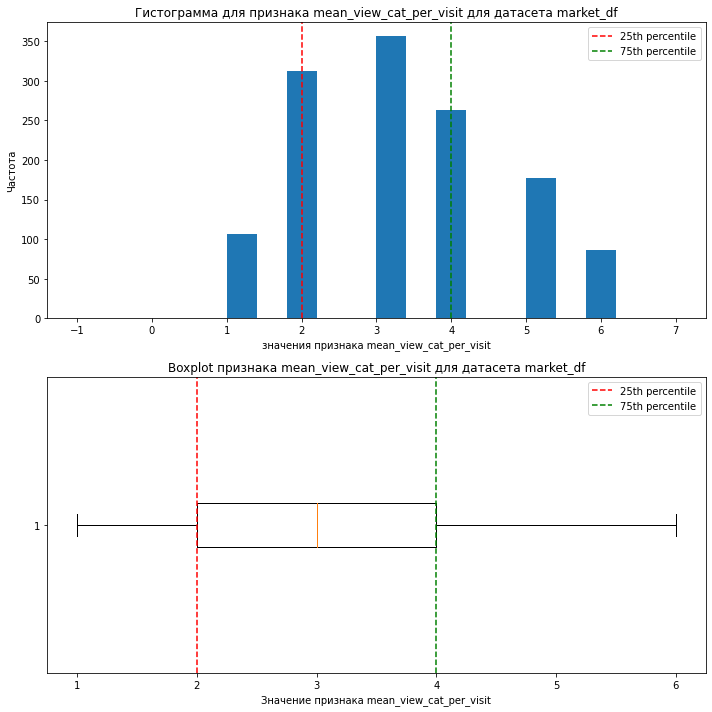

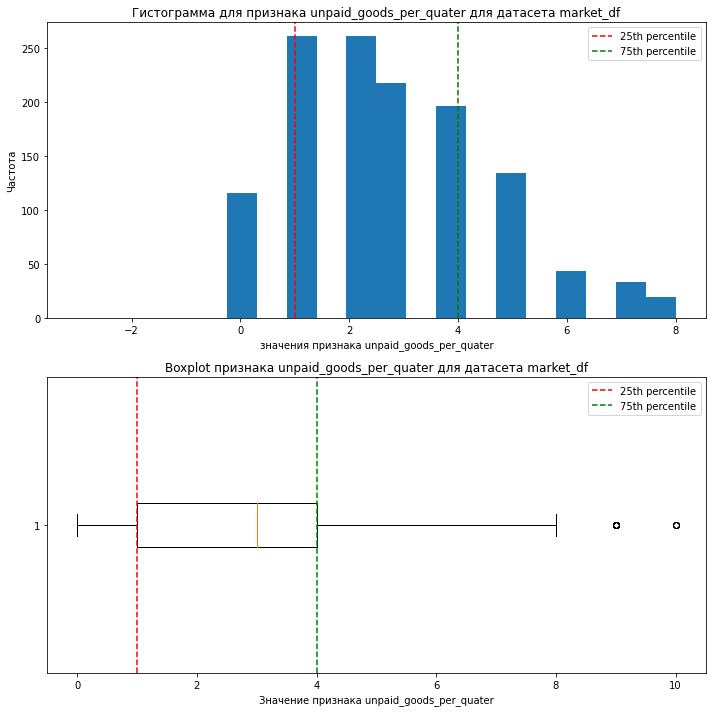

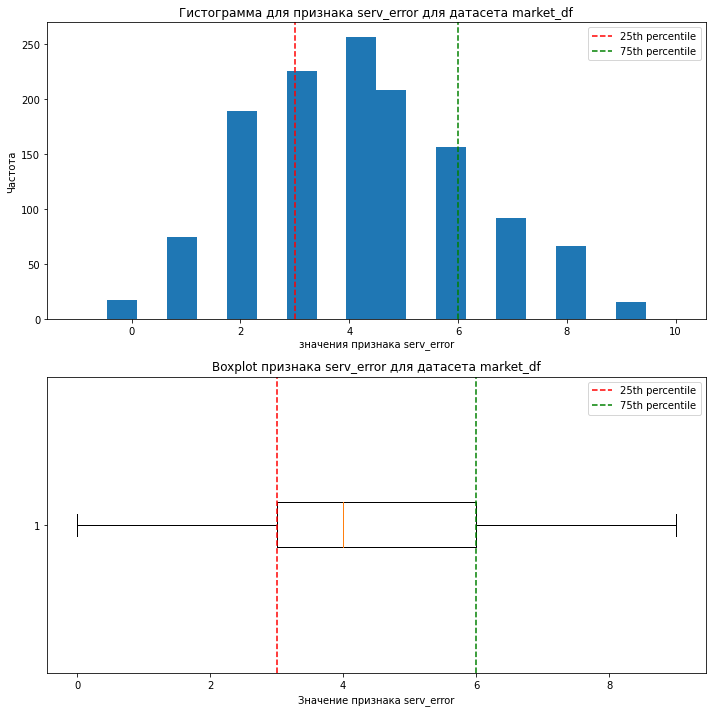

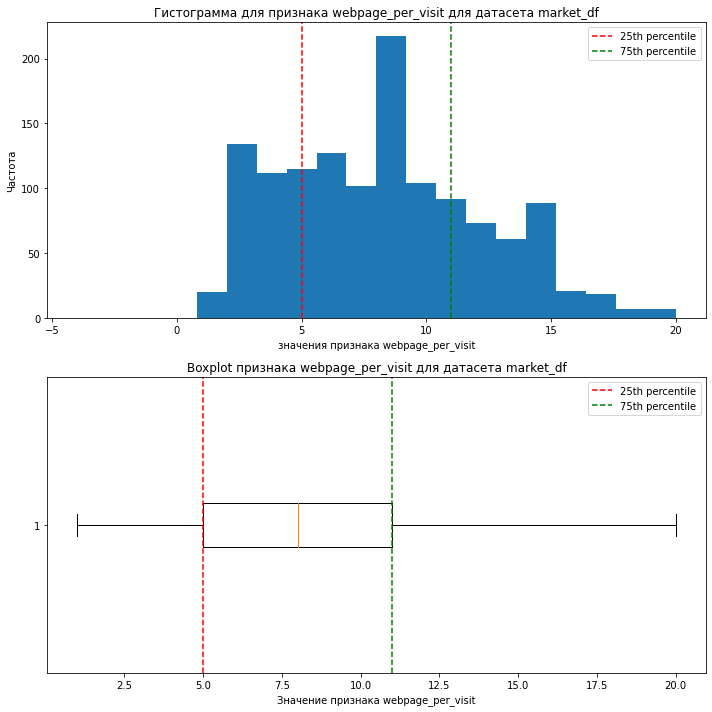

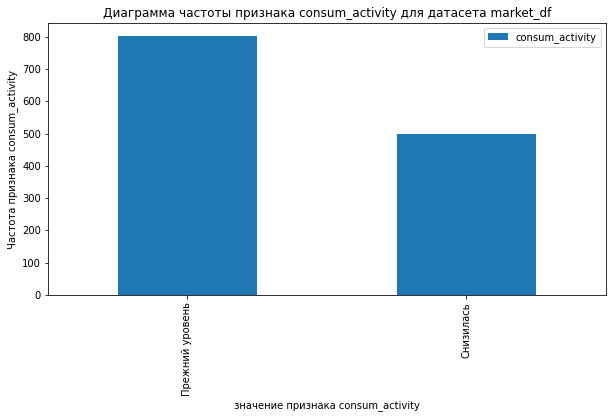

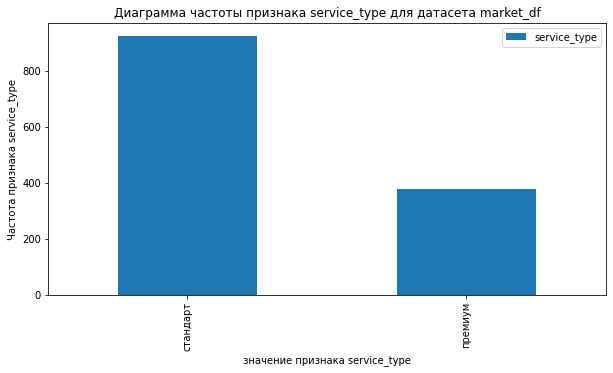

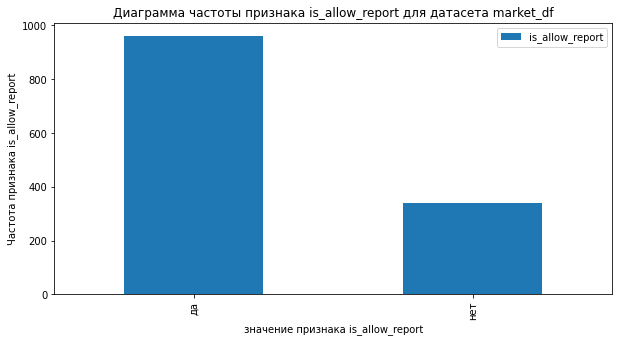

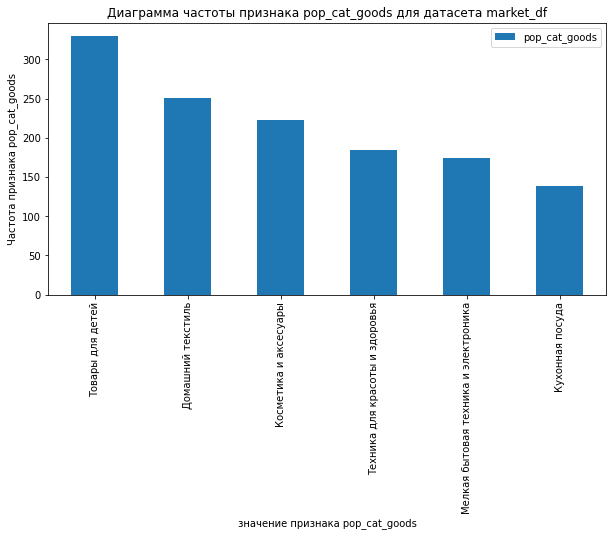




Статистический анализ таблицы market_money_df


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


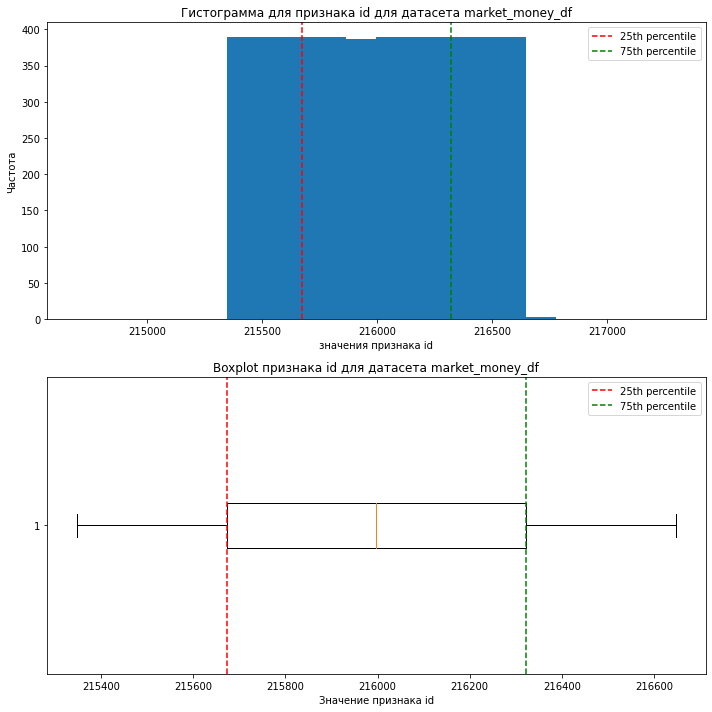

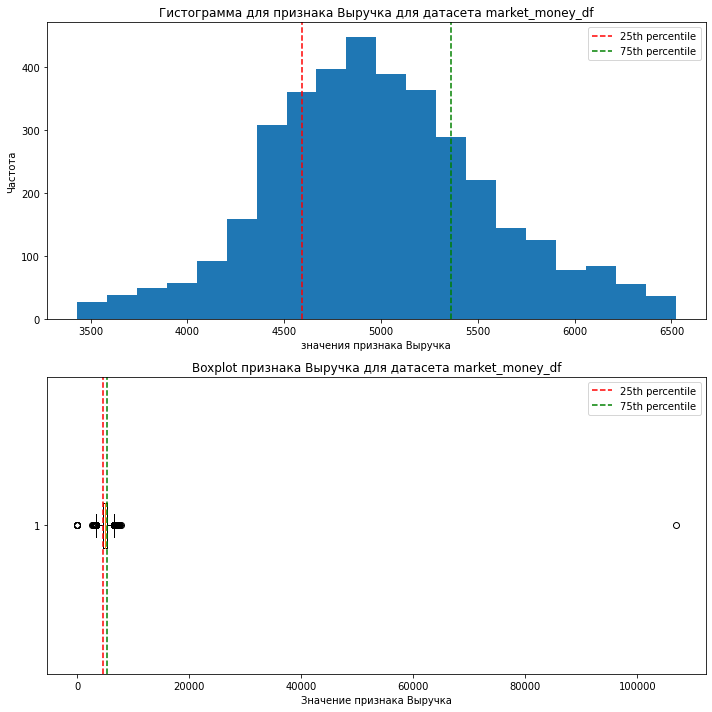

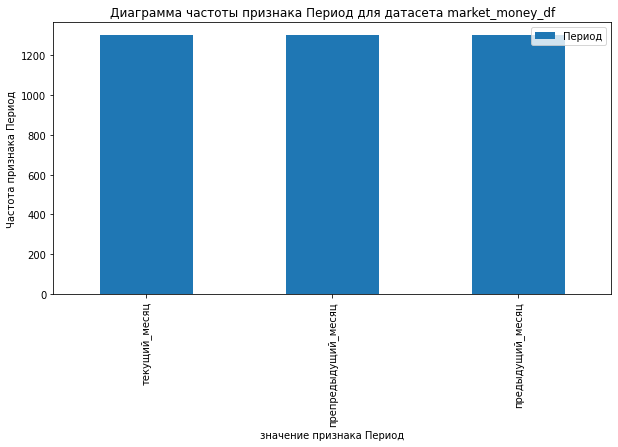




Статистический анализ таблицы market_time_df


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


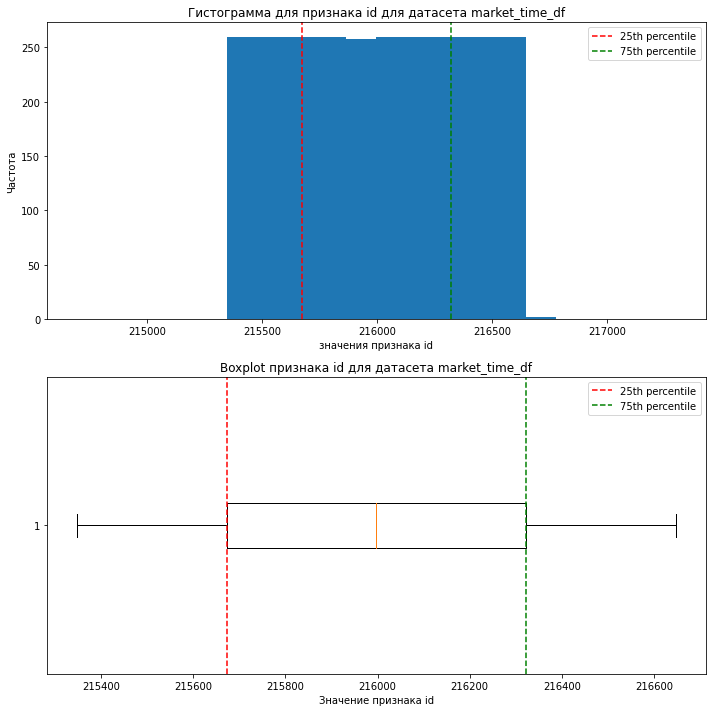

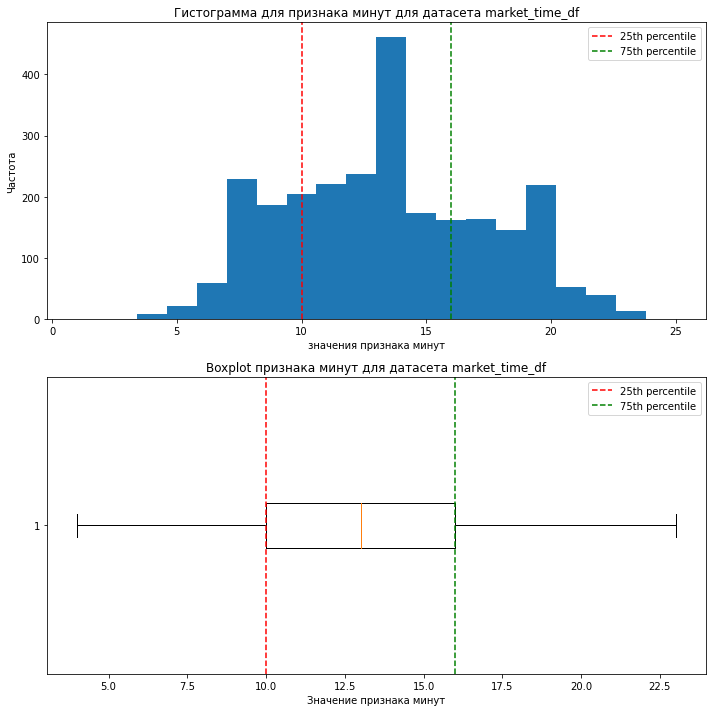

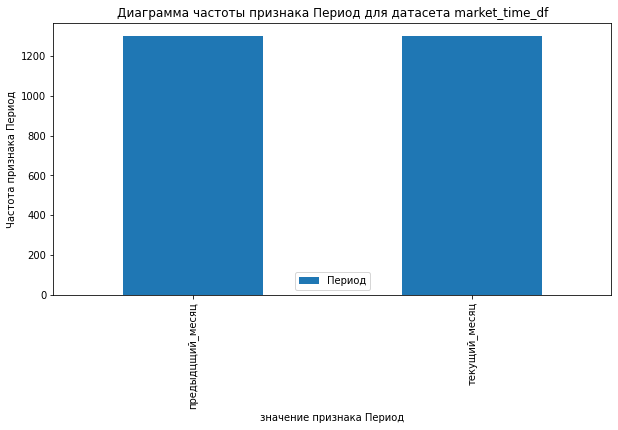




Статистический анализ таблицы money_df


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


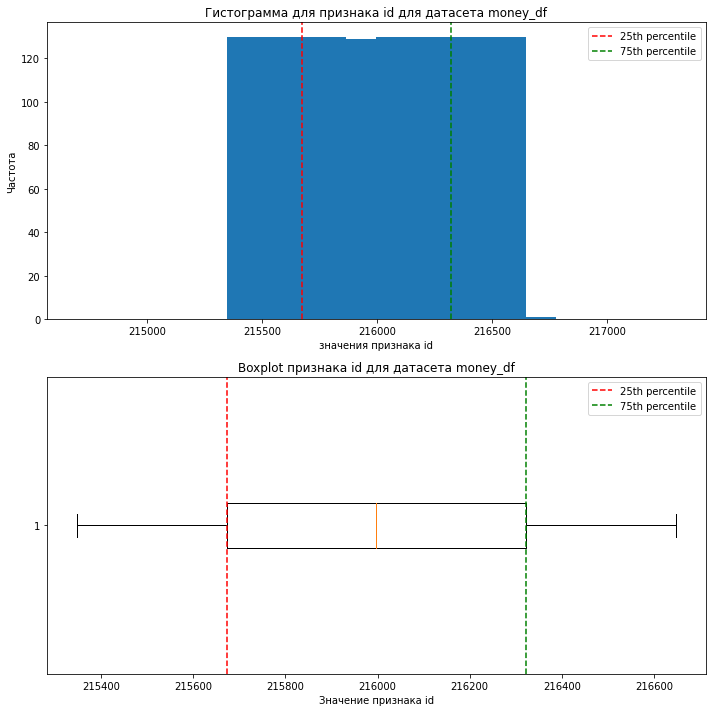

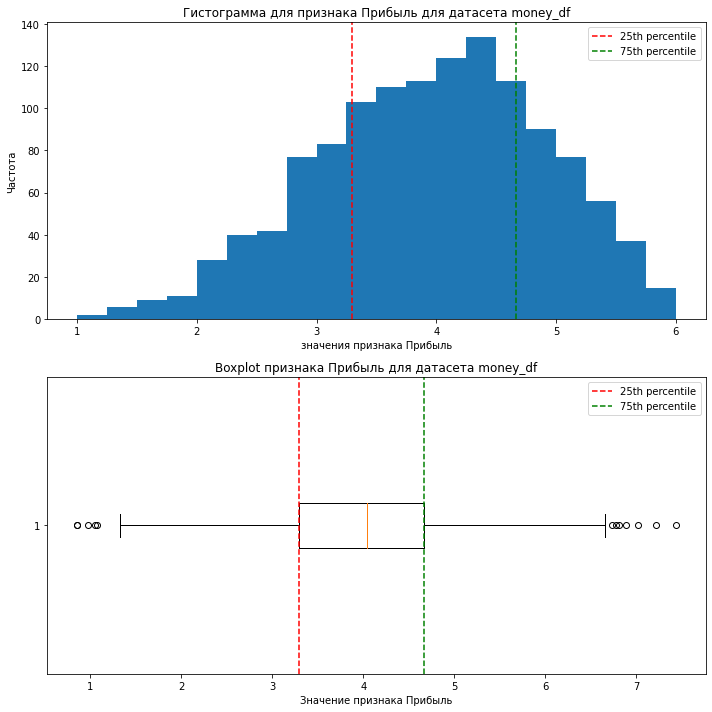

In [41]:
for dataset in [market_df, market_money_df, market_time_df, money_df]:
    analysis_df(dataset)
    print('\n\n')

In [42]:
market_money_df_tr.query('last_last_rev< 3100')

,id,last_last_rev,last_rev,current_rev
0,215348,0.0,0.0,3293.1
9,215357,0.0,0.0,5986.3
11,215359,0.0,0.0,4735.0
130,215478,2960.0,4682.0,3078.3
216,215564,2890.0,4213.0,3334.6
220,215568,2909.0,4740.0,3933.4
368,215716,3067.0,4165.0,3343.9
1097,216445,3061.0,4351.0,4309.0
1286,216634,2970.0,4342.0,4289.5


Выводы:

1) Таблица market_df:
    - среднемесячная маркетинговая активность за последние 6 месяцев распределена нормально, в основном  4 раза в месяц. В редких случаях - 1-2 раза (за границами межквартильного размаха - выбросы). Значит всем клиентам (звонки, рассылки и пр) уделяется по 4 мероприятия в месяц.

    - маркетинговая активность в текущем месяце - строго 4

    - количество дней с момента регистрации пользователя тоже распределено нормально, половина всех пользователей зарегистрировалась от 400 до 800 дней назад (или от 1 года до 2,5 лет назад)

    - доля акционных покупок в месяц смещена вправо. Половина всех значений лежит от 19 до 25%, Нормально считается, если 50% товаров пользователь покупает не по акции (или по акции).  Однако встречаются выбросы - у некоторых покупателей доля покупок по акции составляет от 60 до 100%. Их нужно будет отсмотреть отдельно

    - средний просмотр категорий за визит пользователем - чаще всего 3. Основной набор - от 2 до 5

    - неоплаченные продукты за квартал - в основном от 1 до 5 товаров. Выбросы - более 8 товаров.

    - число сбоев, которые коснулись покупателя во время покупок - 50% пользователей испытывают от 3 до 6.

    - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца. - половина пользователей посещает от 5 до 11 страниц, Нормальным считается посещение от 2 до 20 страниц. Самое частое значение - 8 страниц за один визит на сайт

    - по активности пользователей за последние три месяца - у 40% активность снизилась

    - 30% клиентов из сектора премиум сервиса

    - 30% клиентов не дали согласия на получение рассылок

    - наиболее популярные товары у покупателей это Товары для детей и домашний текстиль. наименее популярные - мелкая быт техника и посуда

2) Таблица market_money_df:
    - прибыль за пред-предпоследний, предпоследний и последний месяцы распределена нормально
    - самая популярная выручка в месяц - в пределах от 4800 до 5200
    - есть несколько значений выбросов - менее 3000 и более 7000 в месяц

3) Таблица market_time_df_tr:
    - проведенное время на сайте за период прошлого и текущего месяца - лежит в границах от 5 до 23 минут
    - половина всех пользователей проводят от 10 до 17 минут, чаще всего - 13 минут

4) Таблица money_df:
    - среднемесячная прибыль с каждого покупателя лежит в пределах от 1,5 до 6,5 - остальное уже выбросы
    - половина покупателей приносит магазину прибыль от 3.3 до 4.7 , чаще всего  - 4

### Шаг 4. Объединение таблиц

Смерджим таблицы market_file.csv, market_money.csv, market_time.csv.

In [43]:
df_market = market_df.merge(market_money_df_tr, how='left', on='id')\
    .merge(market_time_df_tr, how='left', on='id')

In [44]:
df_market.head()

,id,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [45]:
df_market.shape

(1300, 18)

In [46]:
df_market.columns

Index(['id', 'consum_activity', 'service_type', 'is_allow_report',
       'market_activ_6_mon', 'market_activ_cur_mon', 'duration', 'promo',
       'pop_cat_goods', 'mean_view_cat_per_visit', 'unpaid_goods_per_quater',
       'serv_error', 'webpage_per_visit', 'last_last_rev', 'last_rev',
       'current_rev', 'last_dur_minutes', 'current_dur_minutes'],
      dtype='object')

В итоговой таблице сделали отдельный столбец для каждого периода (по времени проведенному на сайте и по принесенной прибыли)

### Шаг 5. Корреляционный анализ

Создадим функцию построения графиков рассеяния для оценки корреляции между признаками. Целевой признак выступит в качестве разделителя данных

##### 1 . Сначала выделим пары признаков, для которых будем строить график рассеяния

In [55]:
from itertools import combinations

list_of_pairs = list(combinations(df_market.drop(['id', 'consum_activity'], axis=1).columns,
                                r=2))

list_of_pairs

[('service_type', 'is_allow_report'),
 ('service_type', 'market_activ_6_mon'),
 ('service_type', 'market_activ_cur_mon'),
 ('service_type', 'duration'),
 ('service_type', 'promo'),
 ('service_type', 'pop_cat_goods'),
 ('service_type', 'mean_view_cat_per_visit'),
 ('service_type', 'unpaid_goods_per_quater'),
 ('service_type', 'serv_error'),
 ('service_type', 'webpage_per_visit'),
 ('service_type', 'last_last_rev'),
 ('service_type', 'last_rev'),
 ('service_type', 'current_rev'),
 ('service_type', 'last_dur_minutes'),
 ('service_type', 'current_dur_minutes'),
 ('is_allow_report', 'market_activ_6_mon'),
 ('is_allow_report', 'market_activ_cur_mon'),
 ('is_allow_report', 'duration'),
 ('is_allow_report', 'promo'),
 ('is_allow_report', 'pop_cat_goods'),
 ('is_allow_report', 'mean_view_cat_per_visit'),
 ('is_allow_report', 'unpaid_goods_per_quater'),
 ('is_allow_report', 'serv_error'),
 ('is_allow_report', 'webpage_per_visit'),
 ('is_allow_report', 'last_last_rev'),
 ('is_allow_report', 'last

2 . Теперь пишем функцию для кодирования категориальных признаков

In [56]:
# создаем функцию для кодирования категориальных признаков

def encode_cat_features(some_df, list_of_cat_feat):

    df_temp = some_df.copy()

    # создаём экземпляр класса OrdinalEncoder для кодирования
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

    # обучаем OrdinalEncoder и преобразовываем выборку для категориальных признаков
    df_temp[list_of_cat_feat] = ordinal_encoder.fit_transform(df_temp[list_of_cat_feat]).astype(int)

    # возращаем измененную таблицу и истинные имена категорий
    return df_temp, ordinal_encoder.categories_

In [57]:
# проверим работу функции
cols_ordinal = ['service_type', 'is_allow_report', 'pop_cat_goods']

temp_df, true_cats = encode_cat_features(df_market, cols_ordinal)

display(temp_df.head())

true_cats

,id,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
0,215348,Снизилась,0,0,3.4,5,121,0.00,5,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,0,0,4.4,4,819,0.75,5,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,1,1,4.9,3,539,0.14,0,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,1,0,3.2,5,896,0.99,5,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,1,1,5.1,3,1064,0.94,5,3,2,3,2,5807.5,4594.0,5872.5,8,11


[array(['премиум', 'стандарт'], dtype=object),
 array(['да', 'нет'], dtype=object),
 array(['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда',
        'Мелкая бытовая техника и электроника',
        'Техника для красоты и здоровья', 'Товары для детей'], dtype=object)]

In [58]:
true_cats[cols_ordinal.index('pop_cat_goods')]

array(['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника',
       'Техника для красоты и здоровья', 'Товары для детей'], dtype=object)

3 . Создаем функции, которые получают на вход:
- датасет
- целевую переменную
- два признака, по которым будет строить рассеяние
- список категориальных переменных

Функции сделают следующее:
- закодируют категориальные признаки, запомнят истинные имена категорий для вывода на печать
- построят график рассеяния признака1 от признака2 с учетом целевого признака
- немного раздвинут точки, которые накладываются друг на друга
- добавят линии тренда

In [59]:
# функция для количественных данных

def plot_scatter_only_numeric(some_df, target_feature, feat1, feat2):

    some_df_encoded, true_cats = encode_cat_features(some_df, cols_ordinal)

    fig, ax = plt.subplots(figsize=(12,4), dpi= 80)


    sns.scatterplot(some_df_encoded,
                            x= feat1,
                            y= feat2,
                            hue= target_feature,
                            ax=ax)

    # поворачиваем все значения по оси X
    plt.xticks(rotation=90)


    for target_value in some_df_encoded[target_feature].unique():
        df_subset = some_df_encoded[some_df[target_feature] == target_value]
        sns.regplot(data=df_subset, x=feat1, y=feat2, scatter=False, ax=ax)

    plt.title(f'График рассеяния {feat1} по {feat2} с учетом признака {target_feature}')

    # Показываем график
    plt.show()

In [60]:
# функция для категориальных признаков

def plot_scatter_categorical(some_df, target_feature, feat1, feat2, cols_ordinal):

    some_df_encoded, true_cats = encode_cat_features(some_df, cols_ordinal)

    fig, ax = plt.subplots(figsize=(12,4), dpi= 80)


    sns.stripplot(some_df_encoded,
                x= feat1,
                y= feat2,
                hue= target_feature,
                jitter=0.1,
                dodge=True,
                size=8, ax=ax, linewidth=.5)

    # поворачиваем все значения по оси X
    plt.xticks(rotation=90)

    # Задаем имена для категорий по оси x,y (только для категориальных признаков)
    if feat1 in cols_ordinal:
        plt.xticks(ticks=some_df_encoded[feat1].unique(),
                labels=true_cats[cols_ordinal.index(feat1)]
                )

    if feat2 in cols_ordinal:
        plt.yticks(ticks=some_df_encoded[feat2].unique(),
                labels=true_cats[cols_ordinal.index(feat2)])


    plt.title(f'График рассеяния {feat1} по {feat2} с учетом признака {target_feature}')

    # Показываем график
    plt.show()

4 . запускаем цикл по всем парам признаков

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'is_allow_report'

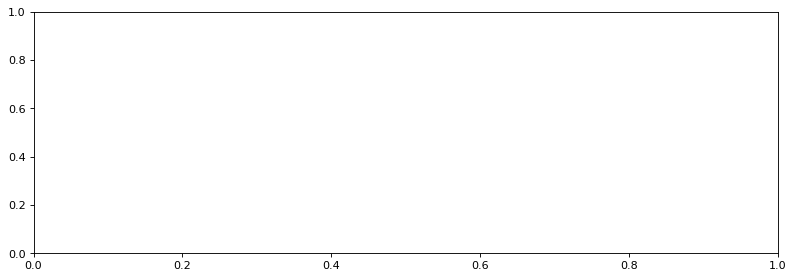

In [61]:
# отфильтруем выбросы по выручке, чтобы не искажать график рассеяния
df_for_plot = df_market.query('(3000<last_last_rev<7000) & (3000<last_rev<7000) & (3000<current_rev<7000)')
cols_ordinal = ['service_type', 'is_allow_report', 'pop_cat_goods']
target_feature = 'consum_activity'


# запустим цикл по всем парам признаков
for pair_of_cols in list_of_pairs:
    feat1 = pair_of_cols[0]
    feat2 = pair_of_cols[1]

    if feat1 in cols_ordinal or feat2 in cols_ordinal:
        plot_scatter_categorical(some_df = df_for_plot,
                                 target_feature=target_feature,
                                 feat1=feat1,
                                 feat2=feat2,
                                 cols_ordinal=cols_ordinal)
    else:
        plot_scatter_only_numeric(some_df=df_for_plot,
                                  target_feature=target_feature,
                                  feat1=feat1,
                                  feat2=feat2)

Мультиколлинеарность нигде не замечена, есть подозрения только на взаимосвязь между выручкой в прошлом, позапрошлом и текущем месяцах.

Проверим

In [62]:
df_market[['last_last_rev', 'last_rev', 'current_rev']].corr(method='spearman')

,last_last_rev,last_rev,current_rev
last_last_rev,1.000000,0.313482,0.876608
last_rev,0.313482,1.000000,0.151969
current_rev,0.876608,0.151969,1.000000


### Шаг 6. Использование пайплайнов

6.1 Создаем константы, фиксируем данные, делим выборки

In [56]:
df_market.head()

,id,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [57]:
df_market.set_index('id', inplace=True)

In [58]:
df_market.head()

,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [59]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X=df_market.drop(['consum_activity'], axis=1)
y=df_market['consum_activity']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = y)

X_train.shape, X_test.shape

((975, 16), (325, 16))

In [60]:
# создаем экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()


# обучаем модель и трансофмируем тренировочную выборку
y_train = label_encoder.fit_transform(y_train)

# трансформируем тестовую выборку
y_test = label_encoder.transform(y_test)

In [61]:
y_train[:5]

array([1, 0, 0, 1, 0])

In [62]:
label_encoder.inverse_transform([1,0,0,1,0])

array(['Снизилась', 'Прежний уровень', 'Прежний уровень', 'Снизилась',
       'Прежний уровень'], dtype=object)

Значение целевого признака = 1 - означает, что активность пользователя снизилась

6.2 Создаем списки для кодирования и масштабирования, создаем пайплайн

In [63]:
# создаём списки с названиями признаков
ohe_columns = ['is_allow_report', 'pop_cat_goods']
ord_columns = ['service_type']
num_columns = ['market_activ_6_mon' , 'market_activ_cur_mon', 'duration', 'promo', 'mean_view_cat_per_visit',
               'unpaid_goods_per_quater', 'serv_error', 'webpage_per_visit', 'last_last_rev', 'last_rev','current_rev',
               'last_dur_minutes', 'current_dur_minutes']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                            categories=[['премиум', 'стандарт']],
                            handle_unknown='use_encoded_value', unknown_value=np.nan
                            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)



# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


6.3 Задаем параметры моделей для подбора лучшей

Для начала выберем подходящую метрику.

- посмотрим на баланс классов целевого признака
- наша задача - это бинарная классификация целевого признака (снизилась/ осталась на прежнем уровне)

In [64]:
y.value_counts()

consum_activity
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64


Принимаем ROC-AUC для оценки качества модели:
- у нас дисбаланс классов, а эта метрика не зависит от него, т.к. показывает зависимость между TruePositiveRate и FalsePositiveRate, А значит, дает корректную оценку модели.
- Также у нас задача бинарный классификации.

Собираем набор параметров для подбора лучшей модели

In [65]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
       'models': [KNeighborsClassifier()],
        # указываем гиперпараметр модели n_neighbors
       'models__n_neighbors': range(2,5),
        # указываем список методов масштабирования
       'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='saga'
            )],
        'models__C': range(1,5),
        'models__penalty': ['l1', 'l2'],

        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели SVC()
    {
        'models': [SVC(kernel = 'poly')
                    ],
        'models__degree': range(2,6),

        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]



In [67]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['is_allow_report',
                                                                                'pop_cat_goods']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simple...
                                        {'models': [LogisticRegression(C=4,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='saga')],
                                         'models__C': range(1, 5),
                                         'models__penalty': ['l1', 'l2'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly')],
                                         'models__degree': range(2, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [69]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


preds= randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, preds[:,1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['is_allow_report',
                                                   'pop_cat_goods']),
                                                 ('ord',
                                                  

Наша лучшая модель - Логистическая регрессия с мощностью 4, регуляризацией Лассо L1.

Лучшее масштабирование данных с помощью. StandartScaler  

Лучшее значение метрики на тренировочных данных 0.898

Лучшее значение метрики на тестовых данных 0.915

### Шаг 7. Анализ важности признаков

Наша модель - логистическая регрессия. Поэтому построим график важности признаков с помощью встроенных методов в модель

Сначала обрабатываем Тренировочную и тестовую выборки с помощью пайплайна.

In [70]:
# перепишем  общий пайплайн для подготовки данных - заменим масштабировщик на Standard
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [71]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
X_train_p.head()

,ohe__is_allow_report_нет,ohe__pop_cat_goods_Косметика и аксесуары,ohe__pop_cat_goods_Кухонная посуда,ohe__pop_cat_goods_Мелкая бытовая техника и электроника,ohe__pop_cat_goods_Техника для красоты и здоровья,ohe__pop_cat_goods_Товары для детей,ord__service_type,num__market_activ_6_mon,num__market_activ_cur_mon,num__duration,num__promo,num__mean_view_cat_per_visit,num__unpaid_goods_per_quater,num__serv_error,num__webpage_per_visit,num__last_last_rev,num__last_rev,num__current_rev,num__last_dur_minutes,num__current_dur_minutes
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.613136,-1.464253,-1.180546,-0.048661,-0.936221,-0.935697,-1.649640,-0.292897,-0.721183,-0.670176,-0.200437,-1.653379,-1.002935
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.138537,1.396763,0.756218,-0.326117,-0.194095,-0.935697,-0.097131,-0.041511,0.260806,-0.753703,0.125838,-0.387243,1.609763
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.792895,-1.464253,0.269057,-0.603572,2.032285,0.578083,-0.097131,1.466807,0.298548,0.483037,0.022333,-0.893697,-0.527899
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.834615,-1.464253,-0.855771,2.606984,-1.678348,3.101050,-0.097131,-1.298443,1.093924,-0.150153,0.332847,0.625666,-0.527899
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333167,-1.464253,-0.455744,-0.365753,-0.936221,1.082676,1.455377,1.215421,-1.093710,-0.939618,-0.395261,1.638575,-0.527899


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Диаграмма весов признаков в модели логистической регрессии - встроенный метод')

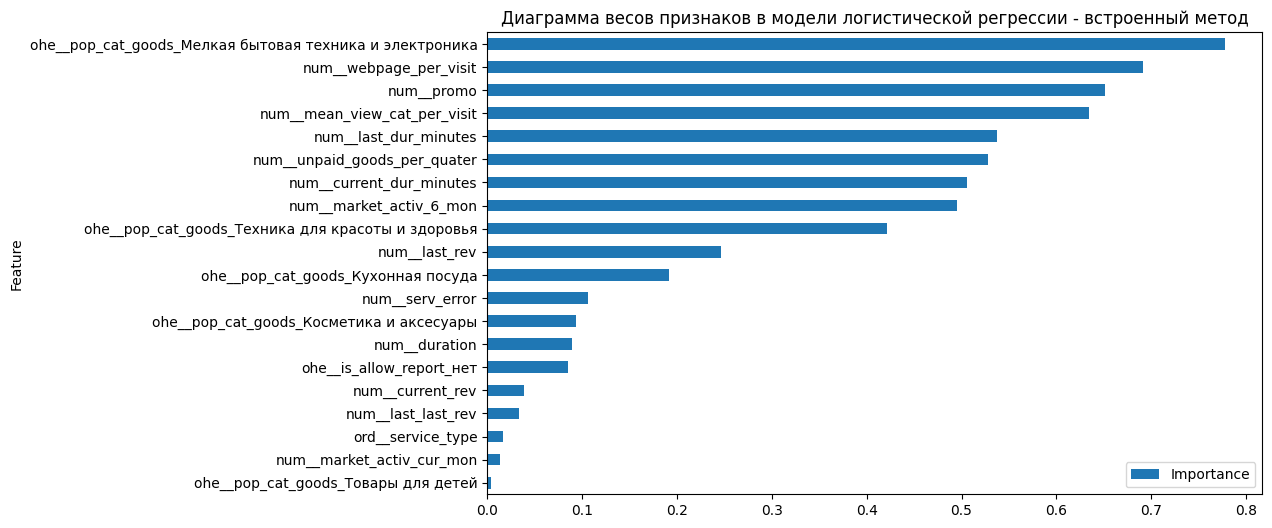

In [73]:
best_model = LogisticRegression(C=4, penalty='l1', random_state=42,
                                    solver='saga')

best_model.fit(X_train_p, y_train)

coefficients = best_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train_p.columns.to_list(), 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

plt.title('Диаграмма весов признаков в модели логистической регрессии - встроенный метод')

Топ-9 признаков, влияющих на предсказание модели,  по версии Шепли:
- покупки клиента в категории "Мелкая бытовая техника и электроника"
- среднее число страниц за визит на отрезке в 3 месяца
- доля акционных покупок за последние полгода

- среднее число просмотренных категорий за визит за последний месяц
- время проведенное на сайте за прошлый месяц
- общее число неолпаченных покупок за последние три месяца
- время проведенное на сайте за текущий месяц
- среднемесячная активность маркетинга за последние полгода

- покупки клиента в категории "Техника для красоты и здоровья"

- выручка с клиента за прошлый месяц

Теперь построим график важности признаков по значениям Шепли (SHAP)

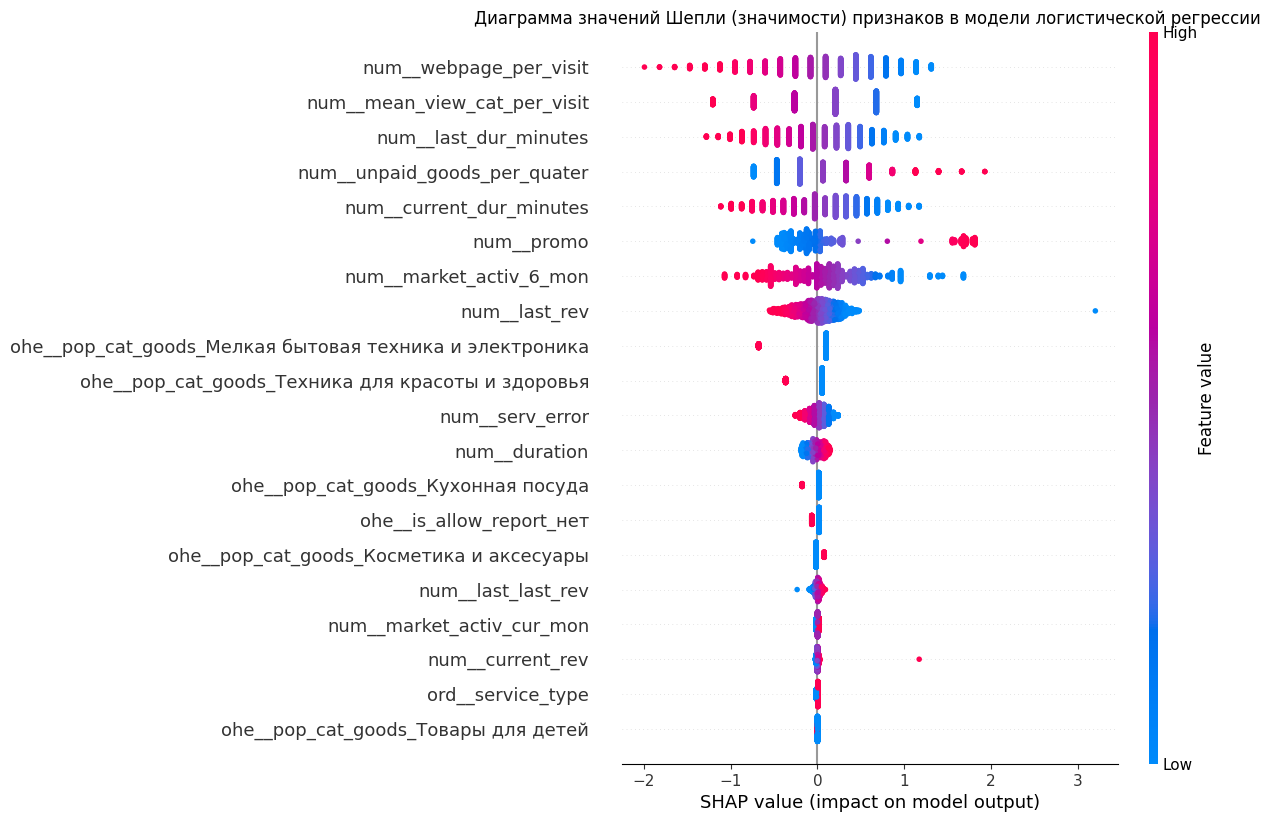

In [74]:
explainer = shap.LinearExplainer(best_model, X_train_p)
shap_values = explainer(X_train_p)



plt.title('Диаграмма значений Шепли (значимости) признаков в модели логистической регрессии ')
shap.plots.beeswarm(shap_values,max_display=20)

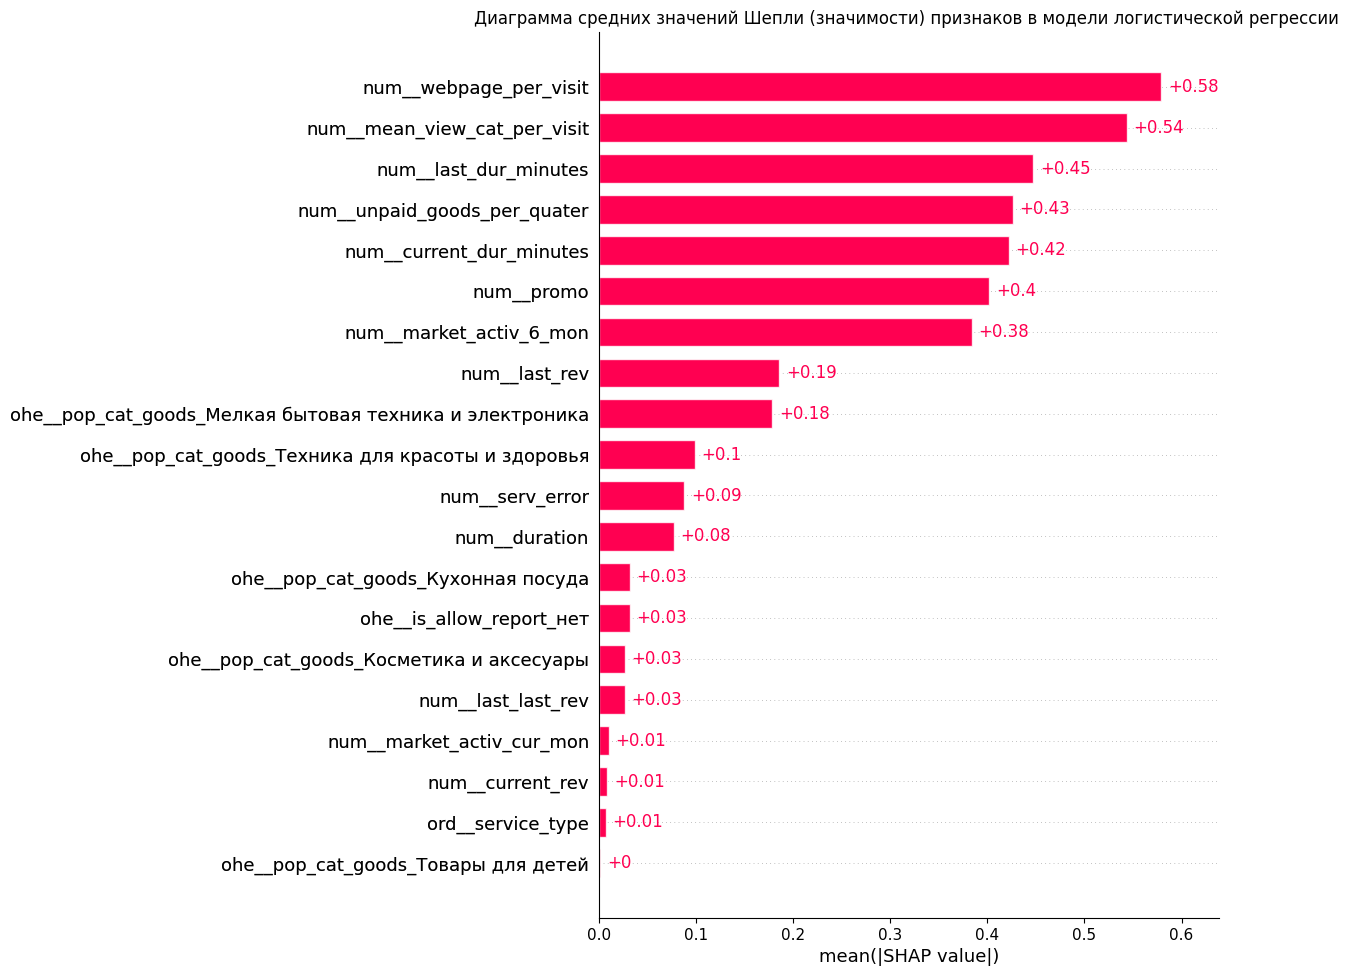

In [75]:
plt.title('Диаграмма средних значений Шепли (значимости) признаков в модели логистической регрессии ')

shap.plots.bar(shap_values, max_display=20)

Топ-9 признаков, влияющих на предсказание модели,  по версии Шепли:
- среднее число страниц за визит на отрезке в 3 месяца
- среднее число просмотренных категорий за визит за последний месяц
- время проведенное на сайте за прошлый месяц
- общее число неолпаченных покупок за последние три месяца

- время проведенное на сайте за текущий месяц
- доля акционных покупок за последние полгода
- среднемесячная активность маркетинга за последние полгода
- выручка с клиента за прошлый месяц
- покупки клиента в категории "Мелкая бытовая техника и электроника"


Итого: Топ-9 весов признаков по разным графикам немного перемешаны по значимости, но все равно практически один и те же:


- среднее число страниц за визит на отрезке в 3 месяца
- среднее число просмотренных категорий за визит за последний месяц
- время проведенное на сайте за прошлый месяц
- общее число неолпаченных покупок за последние три месяца

- время проведенное на сайте за текущий месяц
- доля акционных покупок за последние полгода
- среднемесячная активность маркетинга за последние полгода
- выручка с клиента за прошлый месяц
- покупки клиента в категории "Мелкая бытовая техника и электроника"

<font color='green'>Иными словами, исходя из диаграммы Шелпи значимостью обладают: </font>
1) активность пользователя на сайте - чем больше страниц посещено, отсмотрено категорий, проведено времени на сайте - тем выше вероятность модели отнести его активность к классу 0 ('Прежний уровень')

2) чем больше неоплаченных покупок накапливается в корзине, чем больше акционных покупок совершил пользователь - тем выше вероятность отнести пользователя к классу 1 - Снижение активности

3) активность маркетинга - чем она выше, тем больше вероятность, что актиновсть пользователя сохранится на прежнем уровне

4) чем больше выручка с покупателя, тем выше вероятность, что его активность сохранится

Все выглядит вплоне логично

<font color='green'>Незначимыми признаками при определении активности покупателя стали: </font>
- категории товаров - даже исходя из логики, по ним бессмысленно делать выводы об активности
- тип сервиса - никак не влияет на активность пользователя
- текущая выручка с покупателя (рано делать выводы)
- активность маркетинга в текущем месяце (рано делать выводы)

- выручка за позапрошлый месяц - уже неактуальные данные
- информация о том, разрешил ли пользователь беспокоить его маркетингом
- как давно пользователь на сайте

Посмотрим, что произойдет, если убрать лишние признаки

In [76]:
X_train_cleaned = X_train.drop(['service_type', 'is_allow_report','pop_cat_goods', 'serv_error',
                                'current_rev', 'last_last_rev', 'duration', 'market_activ_cur_mon'],
                               axis=1)

X_test_cleaned = X_test.drop(['service_type', 'is_allow_report','pop_cat_goods', 'serv_error',
                              'current_rev', 'last_last_rev', 'duration', 'market_activ_cur_mon'],
                               axis=1)

In [77]:
X_train_cleaned.columns

Index(['market_activ_6_mon', 'promo', 'mean_view_cat_per_visit',
       'unpaid_goods_per_quater', 'webpage_per_visit', 'last_rev',
       'last_dur_minutes', 'current_dur_minutes'],
      dtype='object')

In [78]:

# создаём списки с названиями признаков

num_columns_new = ['market_activ_6_mon' , 'promo', 'mean_view_cat_per_visit',
               'unpaid_goods_per_quater', 'webpage_per_visit',  'last_rev',
               'last_dur_minutes', 'current_dur_minutes']





# создаём общий пайплайн для подготовки данных
data_preprocessor_new = ColumnTransformer(
    [
     ('num', StandardScaler(), num_columns_new)
    ],
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_new = Pipeline([
    ('preprocessor', data_preprocessor_new),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [79]:
randomized_search = RandomizedSearchCV(
    pipe_new,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train_cleaned, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['market_activ_6_mon',
                                                                                'promo',
                                                                                'mean_view_cat_per_visit',
                                                                                'unpaid_goods_per_quater',
                                                                                'webpage_per_visit',
                                                                                'last_rev',
                                                                                'last_dur_minutes',
                                                                                'current_dur_minutes'])])),
                                             ('models',
                                              DecisionTreeClassifier(random_state...
                                        {'models': [LogisticRegression(C=4,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='saga')],
                                         'models__C': range(1, 5),
                                         'models__penalty': ['l1', 'l2'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly')],
                                         'models__degree': range(2, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [80]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
preds_new= randomized_search.predict_proba(X_test_cleaned)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, preds_new[:,1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['market_activ_6_mon',
                                                   'promo',
                                                   'mean_view_cat_per_visit',
                                                   'unpaid_goods_per_quater',
                                                   'webpage_per_visit',
                                                   'last_rev',
                                                   'last_dur_minutes',
                                                   'current_dur_minutes'])])),
                ('models',
                 LogisticRegression(C=4, penalty='l1', random_state=42,
                                    solver='saga'))])
Метрика лучшей модели на тренировочной выборке: 0.902282565209838
Метрика

Что получилось после удаления лишних признаков?

Лучшая модель не изменилась - Логистическая регрессия с мощностью 4, регуляризацией Лассо L1.

Лучшее масштабирование данных тоже -  StandartScaler  

А вот метрики изменились

Метрика на тренировочных данных увеличилась - 0.902 ( была 0.898)

Лучшее значение метрики на тестовых данных 0.912 (была 0.915)

Это значит, смещение модели незначительно ухудшилось, зато разброс модели улучшился  

#### Общий вывод по анализу важности признаков

<font color='green'>Значимые признаки: </font>
1) активность пользователя на сайте - чем больше страниц посещено, отсмотрено категорий, проведено времени на сайте - тем выше вероятность модели отнести его активность к классу 0 ('Прежний уровень')

2) чем больше неоплаченных покупок накапливается в корзине, чем больше акционных покупок совершил пользователь - тем выше вероятность отнести пользователя к классу 1 - Снижение активности

3) активность маркетинга - чем она выше, тем больше вероятность, что актиновсть пользователя сохранится на прежнем уровне

4) чем больше выручка с покупателя, тем выше вероятность, что его активность сохранится

Все выглядит вплоне логично

<font color='green'>Незначимыми признаками при определении активности покупателя стали: </font>
- категории товаров - даже исходя из логики, по ним бессмысленно делать выводы об активности
- тип сервиса - никак не влияет на активность пользователя
- текущая выручка с покупателя (рано делать выводы)
- активность маркетинга в текущем месяце (рано делать выводы)

- выручка за позапрошлый месяц - уже неактуальные данные
- информация о том, разрешил ли пользователь беспокоить его маркетингом
- как давно пользователь на сайте

<font color='green'>Вывод: стоит определить определить пользователей с риском снижения активности (или с уже сниженной активностью) и дополнительно отработать по ним маркетинговыми действиями (рассылки, звонки, смс, персональные предложения, скидки)
</font>

### Шаг 8. Сегментация покупателей

8.1 Отбор сегмента

Выбраны: Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

На этапе исследовательноского анализа данных выявлено, что большинство пользователей покупают по акции не более 50% от всей своей корзины в течение 6 месяцев.

Отфильтруем (сегментируем) пользователей, у которых:
- активность снизилась
- доля покупок по акции - более 50%

In [81]:
df_market.head()

,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [82]:
prefers_promo_df=  df_market.query('consum_activity == "Снизилась" & promo > 0.5')
prefers_promo_df.head()

,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,4314.0,4765.0,4447.9,13,13
215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,5795.5,4942.0,5484.8,11,9


In [83]:
prefers_promo_df.shape

(134, 17)

Таких 134 покупателя.

Добавим в эту таблицу информацию о полученной с них прибыли

In [84]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [85]:
money_df.describe().T.tail(1)

,count,mean,std,min,25%,50%,75%,max
Прибыль,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43


In [86]:
prefers_promo_df = prefers_promo_df.merge(money_df, on='id', how= 'left')
prefers_promo_df.head()

,id,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes,Прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
1,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
2,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
3,215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,4314.0,4765.0,4447.9,13,13,3.49
4,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,5795.5,4942.0,5484.8,11,9,2.67


In [87]:
prefers_promo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,134.0,215576.917910,153.467689,215349.00,215449.000,215560.00,215690.250,215940.00
market_activ_6_mon,134.0,3.620149,1.100497,0.90,3.025,3.90,4.375,5.70
market_activ_cur_mon,134.0,3.962687,0.676198,3.00,4.000,4.00,4.000,5.00
duration,134.0,614.097015,230.693589,147.00,458.000,627.00,798.500,1064.00
promo,134.0,0.941194,0.041003,0.74,0.930,0.94,0.980,0.99
mean_view_cat_per_visit,134.0,2.641791,1.228747,1.00,2.000,2.00,3.000,6.00
unpaid_goods_per_quater,134.0,3.992537,2.508621,0.00,2.000,4.00,6.000,10.00
serv_error,134.0,4.059701,1.862819,1.00,3.000,4.00,5.000,8.00
webpage_per_visit,134.0,4.753731,2.487371,1.00,3.000,4.00,6.000,14.00
last_last_rev,134.0,4953.492537,807.604685,3146.00,4420.875,5113.25,5537.750,6716.50


Судя по всему, прибыль от этих ребят довольно значимая:
- в среднем они принесли за 3 месяца 3.85 среднемесячных единиц (по всем покупателям эта цифра = 4.00)
- самое частое значение прибыли в месяц с таких покупателей - 4.01 (по всем покупателям эта цифра 4.05)

- минимальное значение прибыли по этому сегменту превышает минимальную прибыль всего списка покупателей

Сравним наш сегмент покупателей:
- с покупателями, которые тоже очень любят акции, но их уровень активность на прежнем уровне
- с покупателями, которые тоже сохраняют активность, но покупают по акции меньше 50% товаров

Смотреть будем на значения признаков, которые больше всего влияют на вероятность снижения аквтиности:
- маркетинг
- взаимодействие с сайтом
- размер прибыли
- объем неоплаченных покупок

In [88]:
print('Активные покупатели с долей акционных товаров более 50%')

df_market.query('consum_activity == "Прежний уровень" & promo > 0.5')\
    .merge(money_df, on='id', how= 'left')\
    .describe().T

Активные покупатели с долей акционных товаров более 50%


,count,mean,std,min,25%,50%,75%,max
id,34.0,216447.735294,154.944821,215765.00,216378.5000,216453.000,216551.0000,216647.00
market_activ_6_mon,34.0,4.361765,0.783935,2.60,3.9000,4.200,4.9000,5.70
market_activ_cur_mon,34.0,4.029412,0.797165,3.00,3.0000,4.000,5.0000,5.00
duration,34.0,559.088235,271.697846,170.00,330.0000,533.500,809.2500,1032.00
promo,34.0,0.938529,0.064297,0.60,0.9400,0.950,0.9500,0.99
mean_view_cat_per_visit,34.0,3.500000,1.331438,1.00,2.2500,4.000,4.0000,6.00
unpaid_goods_per_quater,34.0,2.117647,1.719138,0.00,1.0000,2.000,3.0000,7.00
serv_error,34.0,4.411765,1.653603,0.00,3.0000,5.000,5.7500,7.00
webpage_per_visit,34.0,9.588235,3.105398,4.00,7.0000,9.500,12.0000,15.00
last_last_rev,34.0,4889.529412,679.494442,3061.00,4559.2500,4877.500,5429.6250,5949.50


In [89]:
print('Активные покупатели с долей акционных товаров менее 50%')

df_market.query('consum_activity == "Прежний уровень" & promo < 0.5')\
    .merge(money_df, on='id', how= 'left')\
    .describe().T

Активные покупатели с долей акционных товаров менее 50%


,count,mean,std,min,25%,50%,75%,max
id,768.0,216228.466146,245.435385,215748.00,216038.750,216230.50,216436.250,216646.00
market_activ_6_mon,768.0,4.579297,0.850662,0.90,4.000,4.40,5.300,6.60
market_activ_cur_mon,768.0,4.010417,0.685020,3.00,4.000,4.00,4.000,5.00
duration,768.0,592.131510,254.678246,121.00,387.000,592.50,798.250,1061.00
promo,768.0,0.207370,0.063752,0.11,0.150,0.21,0.250,0.47
mean_view_cat_per_visit,768.0,3.673177,1.275058,1.00,3.000,4.00,5.000,6.00
unpaid_goods_per_quater,768.0,2.300781,1.499030,0.00,1.000,2.00,3.000,8.00
serv_error,768.0,4.332031,1.993579,0.00,3.000,4.00,6.000,9.00
webpage_per_visit,768.0,9.805990,3.389933,3.00,7.000,10.00,12.000,20.00
last_last_rev,768.0,4934.464193,622.967946,2970.00,4503.375,4984.75,5345.375,6531.00


Итак, сходу видно, что у активных пользователей:
- средние и медианные значения активности маркетинга выше, чем у наблюдаемого сегмента на 5-10%. Стоит "шевелить" их чаще

- неоплаченных покупок в два раза меньше, чем у наблюдаемого сегмента. Стоит добавить автоматические уведомления (смс, почта, push-уведомления в приложении) о том, что в корзине есть что-то забытое )

- количество просмотренных страниц и категорий больше в два раза, а времени, проводимого на сайте - на 20-50% больше! Стоит добавить предложения, всплывающие окна с персональными предложениями и/или комментариями в стиле "пользователи также выбирают..."


Посмотрим, как изменяется прибыль от покупателей, которые предпочитают акционные товары, от указанных признаков на графике.

Разделим покупателей на две группы - активные покупатели (прежний уровень) и покупатели со снизившейся активностью

In [90]:
df_for_plot = df_market\
    .merge(money_df, on='id', how= 'left')\
    .query('(promo> 0.5) & (3000<last_last_rev< 7000) & (3000<last_rev< 7000) & (3000<current_rev< 7000)')

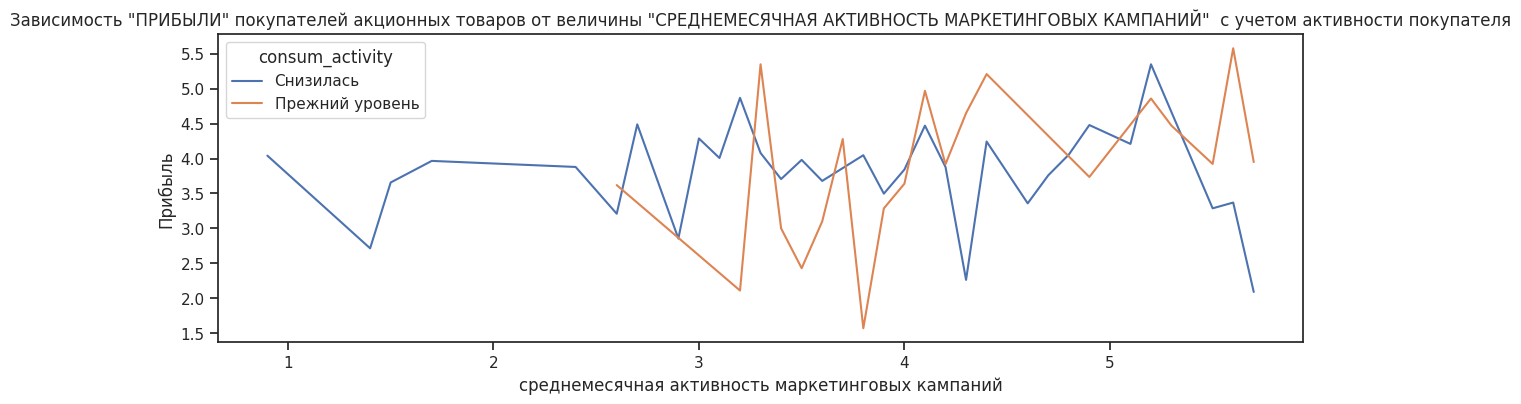

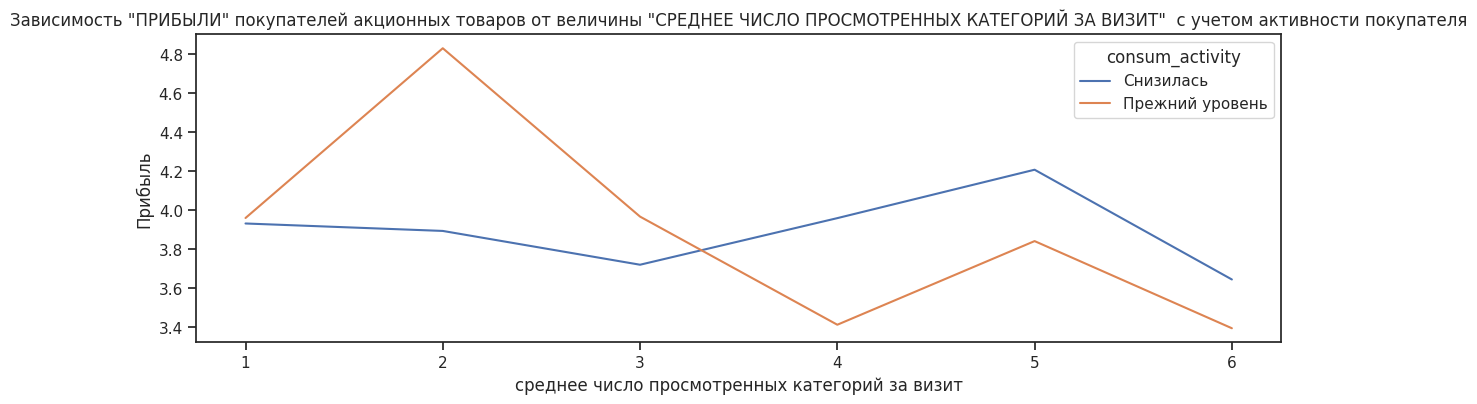

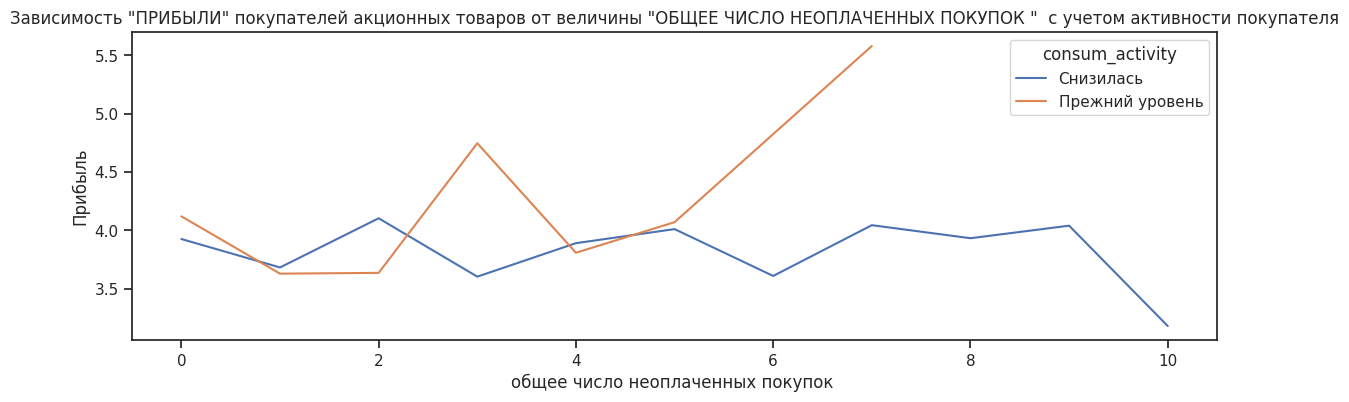

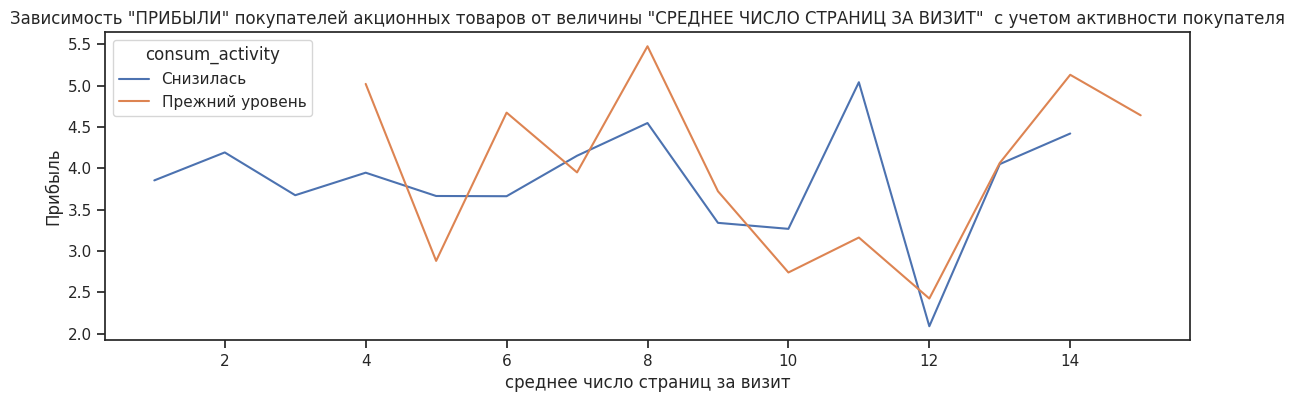

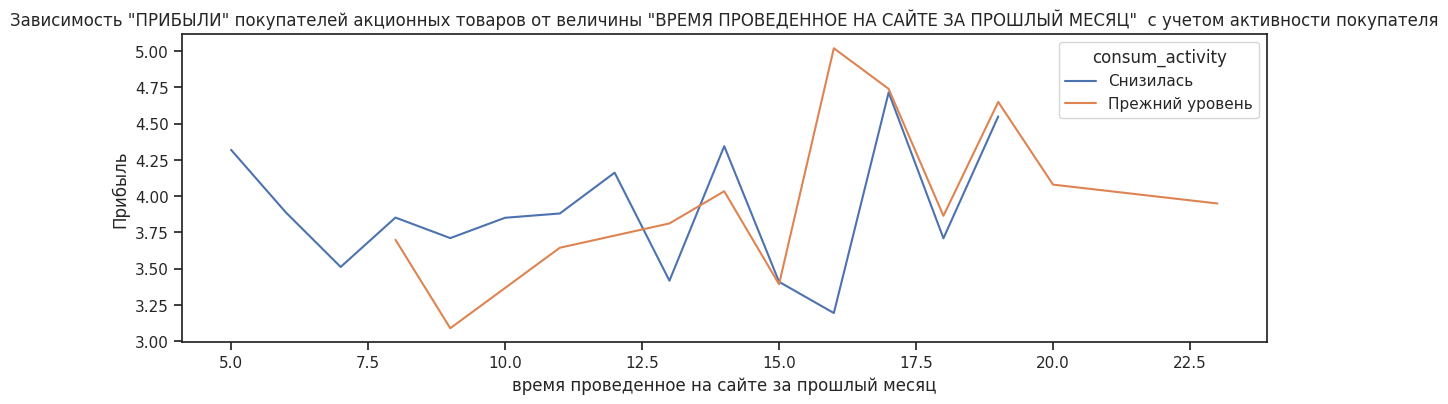

In [91]:
dict_feat_names = {'market_activ_6_mon': 'среднемесячная активность маркетинговых кампаний',
                   'mean_view_cat_per_visit':'среднее число просмотренных категорий за визит',
                   'unpaid_goods_per_quater':'общее число неоплаченных покупок ',
                   'webpage_per_visit': 'среднее число страниц за визит',
                   'last_dur_minutes': 'время проведенное на сайте за прошлый месяц'}

for feat in ['market_activ_6_mon', 'mean_view_cat_per_visit', 'unpaid_goods_per_quater', 'webpage_per_visit', 'last_dur_minutes']:
    plt.figure(figsize=(14, 4))

    sns.set(style="ticks", color_codes=True)
    sns.lineplot(x=feat, y="Прибыль", hue="consum_activity", data=df_for_plot, errorbar=None )
    plt.title(f'Зависимость "ПРИБЫЛИ" покупателей акционных товаров от величины "{dict_feat_names[feat].upper()}"  с учетом активности покупателя')
    plt.xlabel(f"{dict_feat_names[feat]}")
    plt.ylabel("Прибыль")
    plt.show()

#### 8.2 Выводы по сегменту

1) Выбранный сегмент: Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

Причина: снижение покупательской активности напрямую связана с долей акционных покупок

2) Предложения на основе сравнения с группами покупателей, сохранивших Прежний уровень активности:

2.1 необходимо поднять количество оповещений маркетинговой активности на 5-10%.
- Стоит "шевелить" покупателей чаще. Прибыль от активных пользователей при повышении маркетинговых кампаний выше, чем у пассивных

2.2. Необходимо снижать число "забытых" в корзине товаров.
- Стоит добавить автоматические уведомления (смс, почта, push-уведомления в приложении) о том, что в корзине есть что-то забытое )
- Так мы повысим прибыль, засчет повышения активности покупателя

2.3 Необходимо задержать покупателя на сайте и привлечь его внимание на категории, отличные от его обычного выбора - желательно на 20-50% больше!

- Стоит добавить предложения, всплывающие окна с персональными предложениями и/или комментариями в стиле "пользователи также выбирают..."
- Оптимальное число страниц - 6-8.
- При этом, слишком назойливыми тоже нельзя быть - более трех категорий лучше не предлагать

### Шаг 9. Общий вывод

1) Поставленная задача - сохранить или поднять активность покупателей он-лайн магазина

2) В качестве исходных данных были даны 4 таблицы с информацией о:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя.
    - Признаки, которые описывают покупательское поведение клиента.
    
    - Признаки, которые описывают поведение покупателя на сайте.

Данные были предобработаны : исключены дубликаты, пропуски, неявные дубликаты - подготовлены лля анализа.

Также данные были проанализированы на этапе до обучения моделей:

- Таблица market_df:
    - среднемесячная маркетинговая активность за последние 6 месяцев распределена нормально, в основном  4 раза в месяц. В редких случаях - 1-2 раза (за границами межквартильного размаха - выбросы). Значит всем клиентам (звонки, рассылки и пр) уделяется по 4 мероприятия в месяц.

    - маркетинговая активность в текущем месяце - строго 4

    - количество дней с момента регистрации пользователя тоже распределено нормально, половина всех пользователей зарегистрировалась от 400 до 800 дней назад (или от 1 года до 2,5 лет назад)

    - доля акционных покупок в месяц смещена вправо. Половина всех значений лежит от 19 до 25%, Нормально считается, если 50% товаров пользователь покупает не по акции (или по акции).  Однако встречаются выбросы - у некоторых покупателей доля покупок по акции составляет от 60 до 100%. Их нужно будет отсмотреть отдельно

    - средний просмотр категорий за визит пользователем - чаще всего 3. Основной набор - от 2 до 5

    - неоплаченные продукты за квартал - в основном от 1 до 5 товаров. Выбросы - более 8 товаров.

    - число сбоев, которые коснулись покупателя во время покупок - 50% пользователей испытывают от 3 до 6.

    - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца. - половина пользователей посещает от 5 до 11 страниц, Нормальным считается посещение от 2 до 20 страниц. Самое частое значение - 8 страниц за один визит на сайт

    - по активности пользователей за последние три месяца - у 40% активность снизилась

    - 30% клиентов из сектора премиум сервиса

    - 30% клиентов не дали согласия на получение рассылок

    - наиболее популярные товары у покупателей это Товары для детей и домашний текстиль. наименее популярные - мелкая быт техника и посуда

- Таблица market_money_df:
    - прибыль за пред-предпоследний, предпоследний и последний месяцы распределена нормально
    - самая популярная выручка в месяц - в пределах от 4800 до 5200
    - есть несколько значений выбросов - менее 3000 и более 7000 в месяц

- Таблица market_time_df_tr:
    - проведенное время на сайте за период прошлого и текущего месяца - лежит в границах от 5 до 23 минут
    - половина всех пользователей проводят от 10 до 17 минут, чаще всего - 13 минут

- Таблица money_df:
    - среднемесячная прибыль с каждого покупателя лежит в пределах от 1,5 до 6,5 - остальное уже выбросы
    - половина покупателей приносит магазину прибыль от 3.3 до 4.7 , чаще всего  - 4

Дополнительно был сделан корреляционный анализ, который не выявил явной зависимости между признаками.

3) На этапе моделирования было выполнено:

- созданы пайплайны для подготовки данных (кодирование, масштабирование)
- создан пайплайн для обучения 4 разных моделей классификации: Дерево решений, логистическая регрессия, метод опорных векторов и метод ближайших соседей
- проведен поиск лучшей модели и лучших параметров, который показал, что наиболее верное предсказание делает модель ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ.
- лучшее значение метрики (ROC-AUC), устойчивой к дисбалансу классов - 91% точности

- выявлено какие именно параметры опказывают наибольшее влияние на вероятность снижения активности покупателя:

    - активность пользователя на сайте - чем больше страниц посещено, отсмотрено категорий, проведено времени на сайте - тем выше вероятность модели отнести его активность к классу 0 ('Прежний уровень')

    - чем больше неоплаченных покупок накапливается в корзине, чем больше акционных покупок совершил пользователь - тем выше вероятность отнести пользователя к классу 1 - Снижение активности

    - активность маркетинга - чем она выше, тем больше вероятность, что актиновсть пользователя сохранится на прежнем уровне



<font color='green'>Вывод: стоит определить определить пользователей с риском снижения активности (или с уже сниженной активностью) и дополнительно отработать по ним маркетинговыми действиями (рассылки, звонки, смс, персональные предложения, скидки)
</font>


4) Дополнительные выводы и предложения по группе покупателей, который предпочитают товары по акции:

4.1 необходимо поднять количество оповещений маркетинговой активности на 5-10%.
- Стоит "шевелить" покупателей чаще. Прибыль от активных пользователей при повышении маркетинговых кампаний выше, чем у пассивных

4.2. Необходимо снижать число "забытых" в корзине товаров.
- Стоит добавить автоматические уведомления (смс, почта, push-уведомления в приложении) о том, что в корзине есть что-то забытое )
- Так мы повысим прибыль, засчет повышения активности покупателя

4.3 Необходимо задержать покупателя на сайте и привлечь его внимание на категории, отличные от его обычного выбора - желательно на 20-50% больше!

- Стоит добавить предложения, всплывающие окна с персональными предложениями и/или комментариями в стиле "пользователи также выбирают..."
- Оптимальное число страниц - 6-8.
- При этом, слишком назойливыми тоже нельзя быть - более трех категорий лучше не предлагать